
<div class="markdown-google-sans">

# **California Housing Dataset**
---
</div>



<div class="markdown-google-sans">

## Overview
</div>

The California Housing Dataset is based on data from the 1990 census.The dataset contains **10 features** that have **20,640 observations**. Each observation is a single block group within California.

Block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 block groups in the project dataset.

All of the features are numeric except `ocean_proximity` which is of categorical type.

Out of 9 Numeric variables, three are continuous (`longitude`, `latitude`, and `median_income`) and six are discrete (`housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, and `median_house_value`).

`longitude` and `latitude` denote how far west and north the block is respectively. 

`housing_median_age`, `median_income`, and `median_house_value` are the median ages (years), incomes (10,000 USD), and housing price estimates (USD) for each block. 

`total_rooms`, `total_bedrooms`, `population`, and `households` reflect the total number of rooms, bedrooms, people, and housing units in each block.



In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
df = pd.read_csv("Housing.csv")

In [3]:
# Print first 5 rows of data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
# Brief description of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB




> The above summary shows that there are 20,640 records in the whole dataset. Also, the '`total_bedrooms`' attribute has only **20,433 NON-NULL** values which means that **207 records** have **NULL** values. We can also see that '`ocean_proximity`' is not a numerical attribute.

In [5]:
# Summary of the numerical attributes
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


> In the above summary, it can be seen that the median is slightly to significantly less than the mean which implies that the data is **skewed right**.




<div class="markdown-google-sans">

### Q1: What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain  the distribution of the plot.
</div>

In [6]:
# Average meadian income of dataset
print("The mean value of Median Income is {}".format(df["median_income"].mean()))

The mean value of Median Income is 3.8706710029069766


In [7]:
# Brief info of median_income column
df["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

> From the above info, it can be seen that median value is less than the mean, which indicates that the data is **right skewed**.


In [8]:
# Setting the size of figure
sns.set(rc={'figure.figsize':(8,6)})

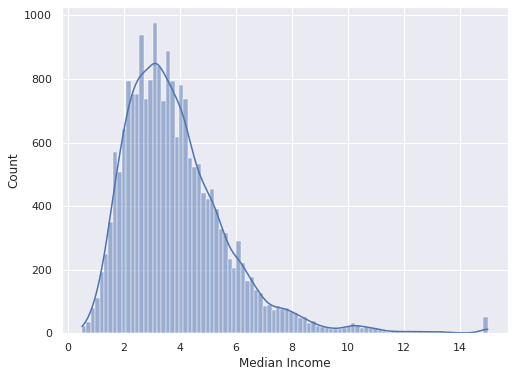

In [9]:
# Histogram Plot for median income
sns.histplot(df["median_income"], kde = True)
plt.xlabel('Median Income')                     # Label of X-axis
plt.show()                                      # View Plot

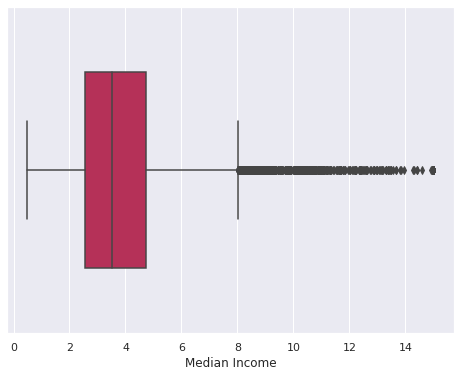

In [10]:
# Box-Whisker Plot for median income
sns.boxplot(data = df, x = "median_income", palette= "rocket", width = 0.6)
plt.xlabel("Median Income")
plt.show()

**Inferences:** The Histogram shows that the data is right skewed which indicates the presence of outliers, showing a presence of higher value median incomes in the category, and the above Box-Whisker plot indicates that the outliers are present after a median income of near to 80,000 USD.

<div class="markdown-google-sans">

### Q2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.
</div>

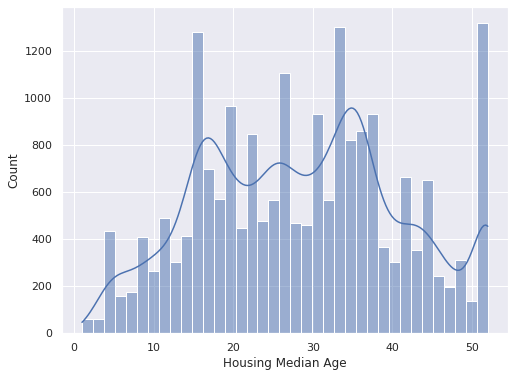

In [11]:
# Histogram plot for housing median age
sns.histplot(df["housing_median_age"], kde = True)
plt.xlabel("Housing Median Age")
plt.show()    

**Inferences:** The above plot mostly shows randomness. Although, there is a peak at the end which indicates that there is a capping limit on the maximum value of Housing Median Age.

<div class="markdown-google-sans">

### Q3. Show with the help of visualization, how median_income and median_house_values are related?
</div>

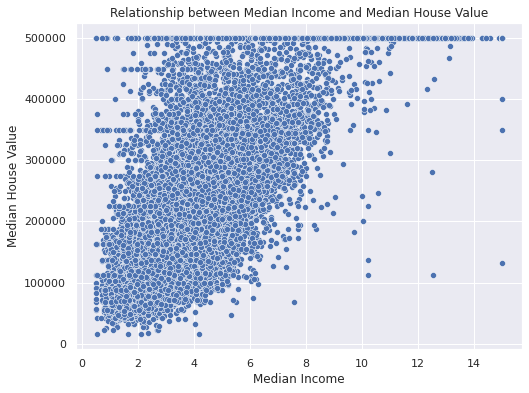

In [12]:
# Scatter Plot
sns.scatterplot(data = df, x= "median_income", y="median_house_value")
plt.xlabel("Median Income")                                               # Label of X-Axis
plt.ylabel("Median House Value")                                          # Label of Y-Axis
plt.title("Relationship between Median Income and Median House Value")    # Title of Plot

plt.show()

**Inferences:** The above Scatter Plot shows a linear relationship between `median_income` and `median_house_value`.The line at the top of graph shows that there is a **capping limit at maximum median house value**. Some Outliers can also be seen in the data.

<div class="markdown-google-sans">

### Q4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.
</div>

In [13]:
# Total null records in total_bedrooms column
df["total_bedrooms"].isnull().sum()

207

In [14]:
# Specifying Condition on index of null records
filt = df[df["total_bedrooms"].isnull()].index
filt

Int64Index([  290,   341,   538,   563,   696,   738,  1097,  1350,  1456,
             1493,
            ...
            19932, 19959, 20046, 20069, 20125, 20267, 20268, 20372, 20460,
            20484],
           dtype='int64', length=207)

In [15]:
# Deleting null Records
new_df = df.drop(index = filt)

In [16]:
# Displaying new dataframe 
new_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


<div class="markdown-google-sans">

### Q5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.
</div>

In [17]:
# Brief overview of null records in attributes
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
# Mean of non-null values
df["total_bedrooms"].mean()

537.8705525375618

In [19]:
# Filling missing records with mean value
df.loc[df["total_bedrooms"].isnull(), "total_bedrooms"] = df["total_bedrooms"].mean()

In [20]:
# Checking the attributes for null records
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<div class="markdown-google-sans">

### Q6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.
</div>

In [21]:
# Creating a user-defined function
def median_val(x):
  y = sorted(x)
  n = len(y)
  if(n%2 == 0):
    med = (y[(n-1)//2] + y[((n-1)//2)+1])/2
  else:
    med = y[n//2]
  return med

In [22]:
# Median of housing_median_age column
median_val(df['housing_median_age'])

29.0

In [23]:
# Verifying the above result
df['housing_median_age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

<div class="markdown-google-sans">

### Q7. Plot latitude versus longitude and explain your observations.
</div>

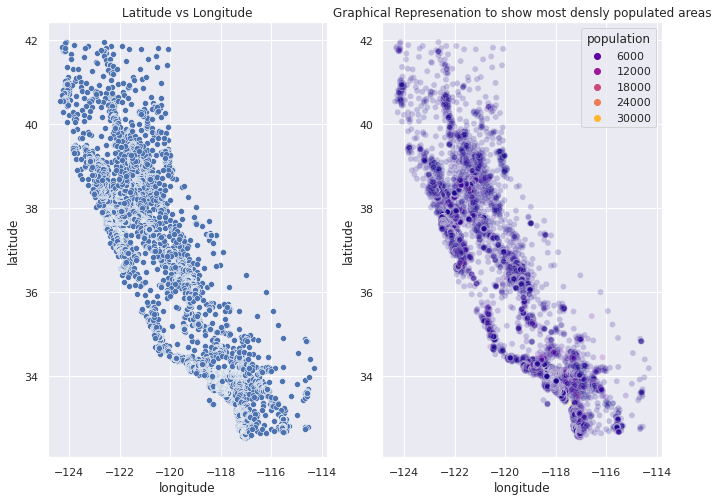

In [24]:
#Setting the figure size
sns.set(rc={'figure.figsize':(11,8)})

# Creating horizontal subplots
fig, axes = plt.subplots(1,2)

# Scatter Plot Latitude vs Longitude
sns.scatterplot(x = df["longitude"], y = df["latitude"],  ax=axes[0]).set(
   title = "Latitude vs Longitude" 
)

# Relation of Latitude vs Longitude with Population density
sns.scatterplot(x = df["longitude"], y = df["latitude"], hue = df["population"], alpha = 0.2, palette = "plasma",  ax=axes[1]).set(
    title = "Graphical Represenation to show most densly populated areas"
)

#Viewing Plot
plt.show()

**Inferences:** The above Scatter Plots shows the negative correlation between Longitude and Latitude, and the plots of the two form the shape of California. It is clear from the plots that there are some areas that are more densely populated than others.They show the metropolitan parts of California: Los Angeles, San Diego, and the San Francisco. 

<div class="markdown-google-sans">

### Q8. Create a data set for which the ocean_proximity is ‘Near ocean’.
</div>

In [25]:
# Summary of value counts 
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [26]:
# Creating a new dataframe from the specified condition
filt = (df["ocean_proximity"] == "NEAR OCEAN")      # Boolean Series
new_df = df[filt]
new_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


<div class="markdown-google-sans">

### Q9. Find the mean and median of the median income for the data set created in question 8.
</div>

In [27]:
# Mean and median of above dataset
new_df["median_income"].agg(['mean', 'median'])

mean      4.005785
median    3.647050
Name: median_income, dtype: float64

<div class="markdown-google-sans">

### Q10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.
</div>

In [28]:
total_bedroom_size = []                     # Declaration of empty list

# Adding elements to list
for i in df["total_bedrooms"]:
    if (i <= 10):
      total_bedroom_size.append("Small")
    elif (i>10 and i <1000):
      total_bedroom_size.append("Medium")
    else:
      total_bedroom_size.append("Large")

In [29]:
#Checking length of list
len(total_bedroom_size)

20640

In [30]:
# Inserting list as a column in DataFrame
df.insert(5, "total_bedroom_size", total_bedroom_size)

In [31]:
# View DataFrame
df.head(50)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_bedroom_size,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,Medium,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,Large,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,Medium,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,Medium,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,Medium,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,Medium,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,Medium,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,Medium,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,Medium,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,Medium,1551,714,3.6912,261100,NEAR BAY


In [32]:
# Value count of each category in column
df["total_bedroom_size"].value_counts()

Medium    18702
Large      1883
Small        55
Name: total_bedroom_size, dtype: int64